## Detect smoke with the help of IOT data and trigger a fire alarm

In [1]:
#Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pwd

'C:\\Users\\Shiny\\Desktop\\smart_bridge\\project1_smoke_detection'

In [3]:
#reading the dataset 
df = pd.read_csv('smoke_detection_iot.csv')
df.head()

,Unnamed: 0,UTC,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,Fire Alarm
0,0,1654733331,20.000,57.36,0,400,12306,18520,939.735,0.0,0.0,0.0,0.0,0.0,0,0
1,1,1654733332,20.015,56.67,0,400,12345,18651,939.744,0.0,0.0,0.0,0.0,0.0,1,0
2,2,1654733333,20.029,55.96,0,400,12374,18764,939.738,0.0,0.0,0.0,0.0,0.0,2,0
3,3,1654733334,20.044,55.28,0,400,12390,18849,939.736,0.0,0.0,0.0,0.0,0.0,3,0
4,4,1654733335,20.059,54.69,0,400,12403,18921,939.744,0.0,0.0,0.0,0.0,0.0,4,0


# Data Preparation

In [4]:
#finding the dimensions of dataset
df.shape

(62630, 16)

In [5]:
#checking for information of features
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62630 entries, 0 to 62629
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      62630 non-null  int64  
 1   UTC             62630 non-null  int64  
 2   Temperature[C]  62630 non-null  float64
 3   Humidity[%]     62630 non-null  float64
 4   TVOC[ppb]       62630 non-null  int64  
 5   eCO2[ppm]       62630 non-null  int64  
 6   Raw H2          62630 non-null  int64  
 7   Raw Ethanol     62630 non-null  int64  
 8   Pressure[hPa]   62630 non-null  float64
 9   PM1.0           62630 non-null  float64
 10  PM2.5           62630 non-null  float64
 11  NC0.5           62630 non-null  float64
 12  NC1.0           62630 non-null  float64
 13  NC2.5           62630 non-null  float64
 14  CNT             62630 non-null  int64  
 15  Fire Alarm      62630 non-null  int64  
dtypes: float64(8), int64(8)
memory usage: 7.6 MB


In [6]:
df. head()

,Unnamed: 0,UTC,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,Fire Alarm
0,0,1654733331,20.000,57.36,0,400,12306,18520,939.735,0.0,0.0,0.0,0.0,0.0,0,0
1,1,1654733332,20.015,56.67,0,400,12345,18651,939.744,0.0,0.0,0.0,0.0,0.0,1,0
2,2,1654733333,20.029,55.96,0,400,12374,18764,939.738,0.0,0.0,0.0,0.0,0.0,2,0
3,3,1654733334,20.044,55.28,0,400,12390,18849,939.736,0.0,0.0,0.0,0.0,0.0,3,0
4,4,1654733335,20.059,54.69,0,400,12403,18921,939.744,0.0,0.0,0.0,0.0,0.0,4,0


In [7]:
#checking for null values
df.isnull().sum()

Unnamed: 0        0
UTC               0
Temperature[C]    0
Humidity[%]       0
TVOC[ppb]         0
eCO2[ppm]         0
Raw H2            0
Raw Ethanol       0
Pressure[hPa]     0
PM1.0             0
PM2.5             0
NC0.5             0
NC1.0             0
NC2.5             0
CNT               0
Fire Alarm        0
dtype: int64

In [8]:
#dropping the unnecessary columns
df.drop(columns = ['Unnamed: 0','UTC'],axis = 1,inplace = True)

In [9]:
df.head()

,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,Fire Alarm
0,20.000,57.36,0,400,12306,18520,939.735,0.0,0.0,0.0,0.0,0.0,0,0
1,20.015,56.67,0,400,12345,18651,939.744,0.0,0.0,0.0,0.0,0.0,1,0
2,20.029,55.96,0,400,12374,18764,939.738,0.0,0.0,0.0,0.0,0.0,2,0
3,20.044,55.28,0,400,12390,18849,939.736,0.0,0.0,0.0,0.0,0.0,3,0
4,20.059,54.69,0,400,12403,18921,939.744,0.0,0.0,0.0,0.0,0.0,4,0


# Descriptive Statistical Analysis

In [10]:
df.describe()

,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,Fire Alarm
count,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000
mean,15.970424,48.539499,1942.057528,670.021044,12942.453936,19754.257912,938.627649,100.594309,184.467770,491.463608,203.586487,80.049042,10511.386157,0.714626
std,14.359576,8.865367,7811.589055,1905.885439,272.464305,609.513156,1.331344,922.524245,1976.305615,4265.661251,2214.738556,1083.383189,7597.870997,0.451596
min,-22.010000,10.740000,0.000000,400.000000,10668.000000,15317.000000,930.852000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,10.994250,47.530000,130.000000,400.000000,12830.000000,19435.000000,938.700000,1.280000,1.340000,8.820000,1.384000,0.033000,3625.250000,0.000000
50%,20.130000,50.150000,981.000000,400.000000,12924.000000,19501.000000,938.816000,1.810000,1.880000,12.450000,1.943000,0.044000,9336.000000,1.000000
75%,25.409500,53.240000,1189.000000,438.000000,13109.000000,20078.000000,939.418000,2.090000,2.180000,14.420000,2.249000,0.051000,17164.750000,1.000000
max,59.930000,75.200000,60000.000000,60000.000000,13803.000000,21410.000000,939.861000,14333.690000,45432.260000,61482.030000,51914.680000,30026.438000,24993.000000,1.000000


In [11]:
#checking the value counts for target column

df['Fire Alarm'].value_counts()
# 1- Fire is there
# 0- No fire

1    44757
0    17873
Name: Fire Alarm, dtype: int64

From the above value counts, it is known that the dataset is imbalanced.

# Visualizations

# 1.Univariate Analysis

In [12]:
from matplotlib import rc_params

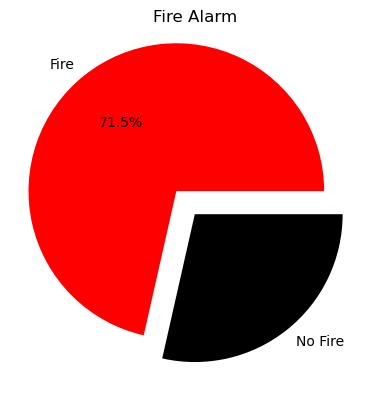

In [13]:
plt.pie(df['Fire Alarm'].value_counts(),[0.2,0],labels=['Fire','No Fire'],autopct='%1.1f%%',colors=['red','black'])
plt.title('Fire Alarm')
plt.show()

C:\Users\Shiny\AppData\Local\Temp\ipykernel_28700\313921763.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Temperature[C]'])


<AxesSubplot: xlabel='Temperature[C]', ylabel='Density'>

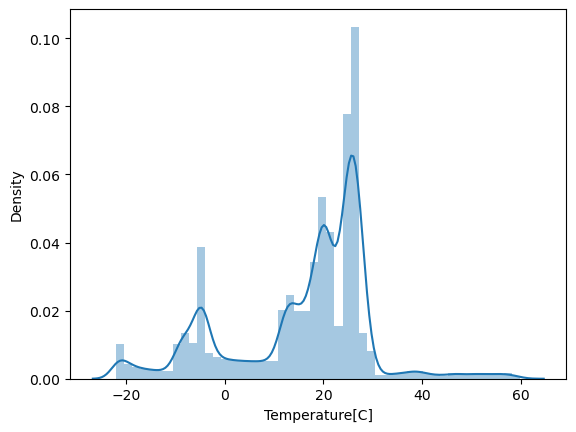

In [14]:
sns.distplot(df['Temperature[C]'])

C:\Users\Shiny\AppData\Local\Temp\ipykernel_28700\3104779193.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Humidity[%]'])


<AxesSubplot: xlabel='Humidity[%]', ylabel='Density'>

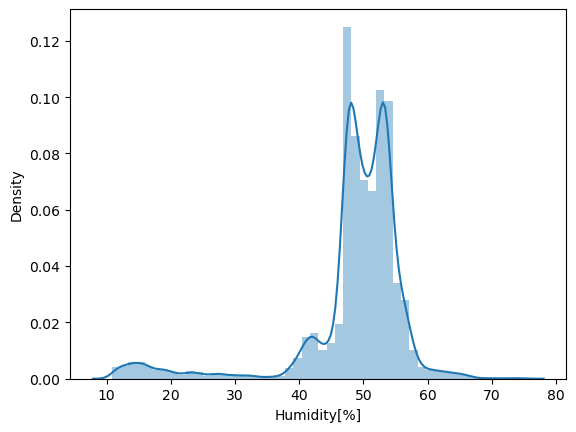

In [15]:
sns.distplot(df['Humidity[%]'])

# 2. Bivariate Analysis

<AxesSubplot: xlabel='NC1.0', ylabel='NC2.5'>

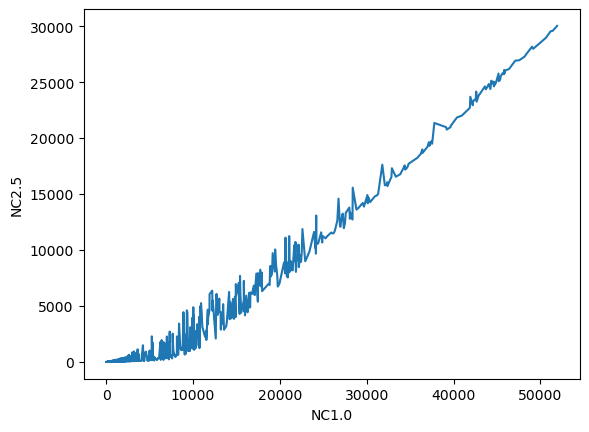

In [16]:
import seaborn as sns
sns.lineplot(x='NC1.0', y='NC2.5', data=df)

KeyboardInterrupt: 

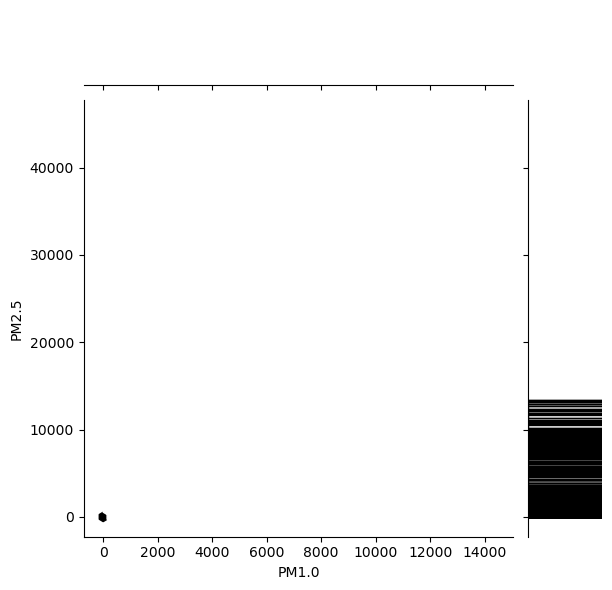

In [18]:
import seaborn as sns
sns.jointplot(x='PM1.0', y='PM2.5', data=df, kind='hex')

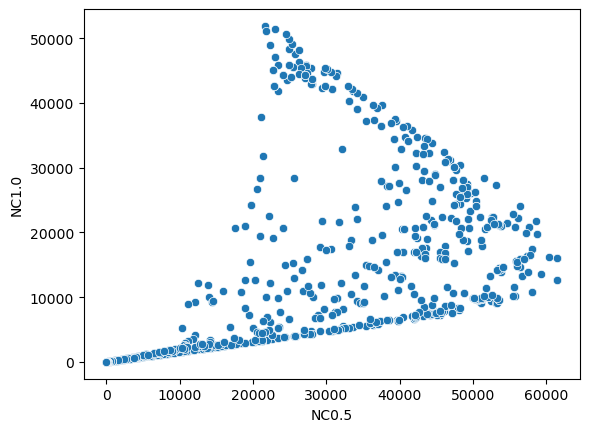

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.scatterplot(x='NC0.5', y='NC1.0', data=df)
plt.xlabel('NC0.5')
plt.ylabel('NC1.0')
plt.show()

# 3. Multivariate Analysis

<AxesSubplot: >

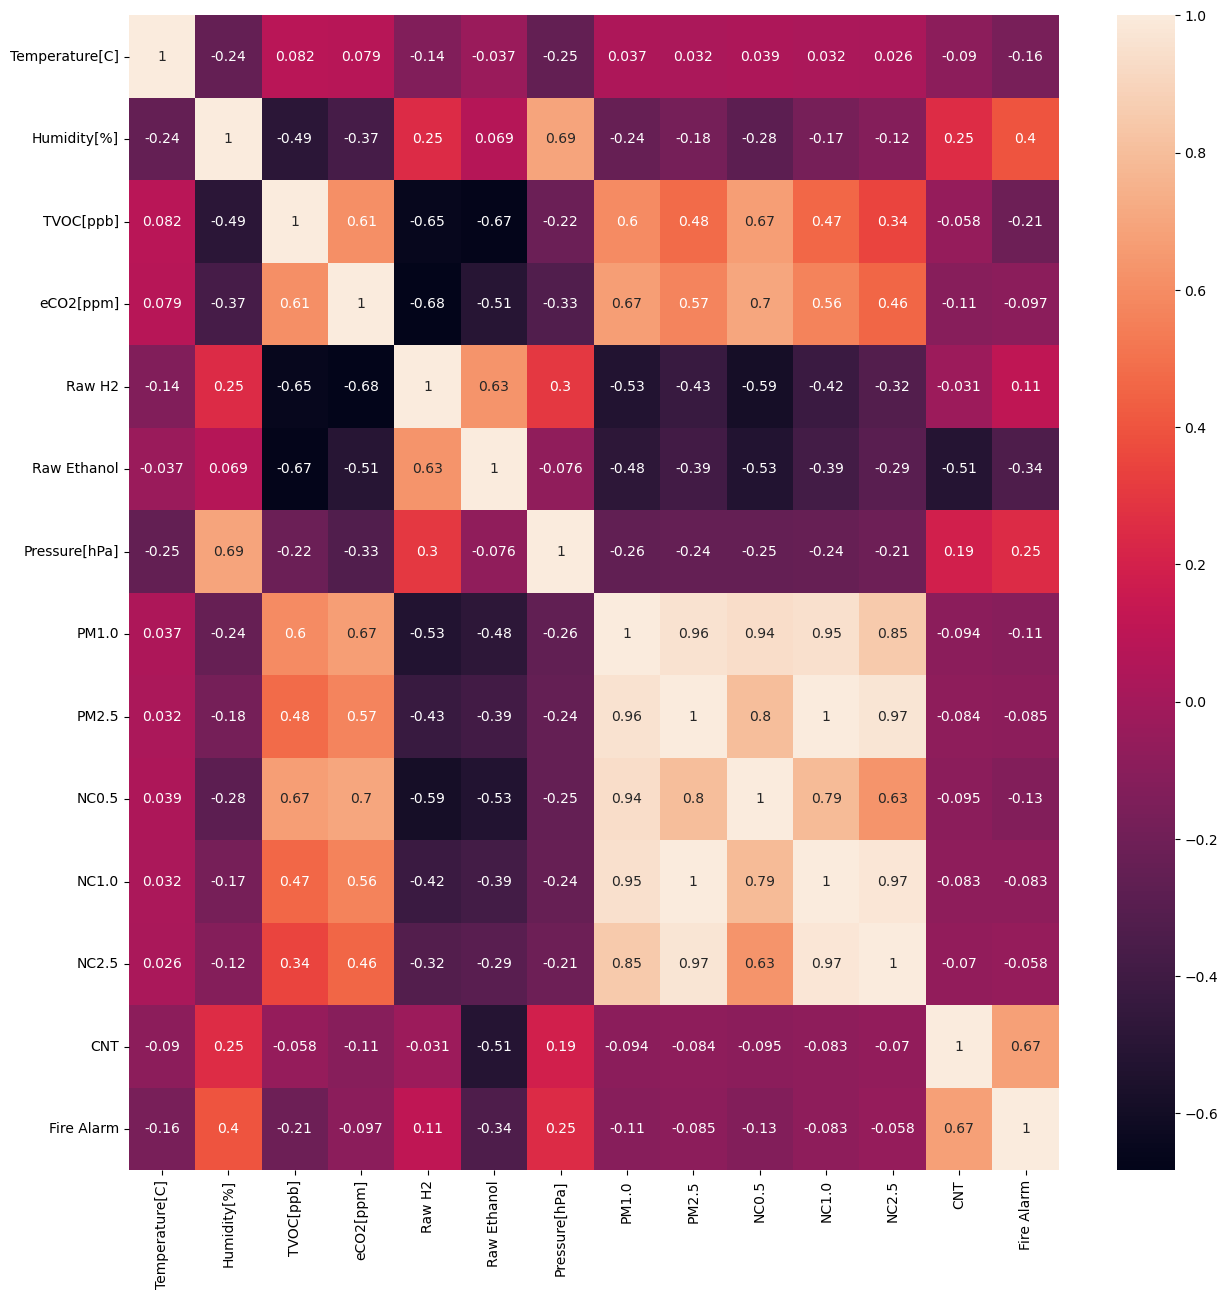

In [20]:
#correlation heatmap analysis
plt.figure(figsize=(15,15))

sns.heatmap(df.corr(),annot=True)

multicollinearity between pairs (NC1.0, NC2.5) and (PM1.0 , PM2.5).Therefore,
we can drop any one of the columns from a pair


In [21]:
df.drop(columns = ['NC1.0','PM1.0'],axis = 1,inplace =True)

In [22]:
df.head()

,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM2.5,NC0.5,NC2.5,CNT,Fire Alarm
0,20.000,57.36,0,400,12306,18520,939.735,0.0,0.0,0.0,0,0
1,20.015,56.67,0,400,12345,18651,939.744,0.0,0.0,0.0,1,0
2,20.029,55.96,0,400,12374,18764,939.738,0.0,0.0,0.0,2,0
3,20.044,55.28,0,400,12390,18849,939.736,0.0,0.0,0.0,3,0
4,20.059,54.69,0,400,12403,18921,939.744,0.0,0.0,0.0,4,0


In [23]:
#finding the correlation between independent variables and dependent variable
df.corr()["Fire Alarm"].sort_values(ascending=False)

Fire Alarm        1.000000
CNT               0.673762
Humidity[%]       0.399846
Pressure[hPa]     0.249797
Raw H2            0.107007
NC2.5            -0.057707
PM2.5            -0.084916
eCO2[ppm]        -0.097006
NC0.5            -0.128118
Temperature[C]   -0.163902
TVOC[ppb]        -0.214743
Raw Ethanol      -0.340652
Name: Fire Alarm, dtype: float64

In [24]:
df.shape

(62630, 12)

Hence, there are 11 independent variables and 1 dependent variable after checking multicollinearity.

# Feature Selection

out of 11 independent variables, selecting 8 variables which are highly corelated
Therefore droping NC2.5,PM2.5,eCO2[ppm]        

In [25]:
df.drop(columns = ['NC2.5','PM2.5','eCO2[ppm]'],axis = 1,inplace =True)

In [26]:
df.head()

,Temperature[C],Humidity[%],TVOC[ppb],Raw H2,Raw Ethanol,Pressure[hPa],NC0.5,CNT,Fire Alarm
0,20.000,57.36,0,12306,18520,939.735,0.0,0,0
1,20.015,56.67,0,12345,18651,939.744,0.0,1,0
2,20.029,55.96,0,12374,18764,939.738,0.0,2,0
3,20.044,55.28,0,12390,18849,939.736,0.0,3,0
4,20.059,54.69,0,12403,18921,939.744,0.0,4,0


In [27]:
# splitting into indepenent and dependent variable

X=df.drop(columns = ['Fire Alarm'])

y=df['Fire Alarm']



Performing the feature scaling

In [28]:
X = df.drop(columns=['Fire Alarm'])
y = df['Fire Alarm']
from sklearn.preprocessing import MinMaxScaler
scale = MinMaxScaler()
X_scaled = pd.DataFrame(scale.fit_transform(X), columns=X.columns)
X_scaled.head()

,Temperature[C],Humidity[%],TVOC[ppb],Raw H2,Raw Ethanol,Pressure[hPa],NC0.5,CNT
0,0.512692,0.723239,0.0,0.522488,0.525685,0.986014,0.0,0.00000
1,0.512875,0.712535,0.0,0.534928,0.547185,0.987013,0.0,0.00004
2,0.513046,0.701520,0.0,0.544179,0.565731,0.986347,0.0,0.00008
3,0.513229,0.690971,0.0,0.549282,0.579682,0.986125,0.0,0.00012
4,0.513412,0.681818,0.0,0.553429,0.591498,0.987013,0.0,0.00016


In [29]:
#split the dataset into training and testing sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=0)


In [30]:
y_train.value_counts()

1    31391
0    12450
Name: Fire Alarm, dtype: int64

As the dataset is imbalanced, performing SMOTE to balance it

In [31]:
#smote
from imblearn.over_sampling import SMOTE
smote = SMOTE()
x_train_smote, y_train_smote = smote.fit_resample(x_train, y_train)


In [32]:
y_train_smote.value_counts()

0    31391
1    31391
Name: Fire Alarm, dtype: int64

# Model Building

Logistic Regression

In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report



model_lr = LogisticRegression()
model_lr.fit(x_train_smote, y_train_smote)
y_pred_test_lr = model_lr.predict(x_test)
y_pred_train_lr = model_lr.predict(x_train_smote)
test_acc_lr = accuracy_score(y_test, y_pred_test_lr)
train_acc_lr = accuracy_score(y_train_smote, y_pred_train_lr)

print('Logistic Regression Test Accuracy: ', test_acc_lr)


print(classification_report(y_test, y_pred_test_lr))

Logistic Regression Test Accuracy:  0.9453935813507903
              precision    recall  f1-score   support

           0       0.85      0.98      0.91      5423
           1       0.99      0.93      0.96     13366

    accuracy                           0.95     18789
   macro avg       0.92      0.96      0.94     18789
weighted avg       0.95      0.95      0.95     18789



In [34]:
pd.crosstab(y_test, y_pred_test_lr)

col_0,0,1
Fire Alarm,,
0,5315,108
1,918,12448


Support vector machine

In [35]:
from sklearn.svm import SVC
model_svm = SVC()
model_svm.fit(x_train_smote, y_train_smote)
y_pred_test_svm = model_svm.predict(x_test)
y_pred_train_svm = model_svm.predict(x_train_smote)
test_acc_svm = accuracy_score(y_test, y_pred_test_svm)
train_acc_svm = accuracy_score(y_train_smote, y_pred_train_svm)
print('SVM Test Accuracy: ', test_acc_svm)


print(classification_report(y_test, y_pred_test_svm))

SVM Test Accuracy:  0.9995742189579009
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5423
           1       1.00      1.00      1.00     13366

    accuracy                           1.00     18789
   macro avg       1.00      1.00      1.00     18789
weighted avg       1.00      1.00      1.00     18789



In [36]:
pd.crosstab(y_test, y_pred_test_svm)

col_0,0,1
Fire Alarm,,
0,5416,7
1,1,13365


 Gradient Boosting Algorithm

In [37]:
from sklearn.ensemble import GradientBoostingClassifier
model_gb = GradientBoostingClassifier()
model_gb.fit(x_train_smote, y_train_smote)
y_pred_test_gb = model_gb.predict(x_test)
y_pred_train_gb = model_gb.predict(x_train_smote)
test_acc_gb = accuracy_score(y_test, y_pred_test_gb)
train_acc_gb = accuracy_score(y_train_smote, y_pred_train_gb)
print('Gradient Boosting Test Accuracy: ', test_acc_gb)

print(classification_report(y_test, y_pred_test_gb))

Gradient Boosting Test Accuracy:  0.9999467773697376
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5423
           1       1.00      1.00      1.00     13366

    accuracy                           1.00     18789
   macro avg       1.00      1.00      1.00     18789
weighted avg       1.00      1.00      1.00     18789



In [38]:
pd.crosstab(y_test, y_pred_test_gb)

col_0,0,1
Fire Alarm,,
0,5423,0
1,1,13365


 K nearest neighbhors(KNN)

In [39]:
from sklearn.neighbors import KNeighborsClassifier
model_knn = KNeighborsClassifier()
model_knn.fit(x_train_smote, y_train_smote)
y_pred_test_knn = model_knn.predict(x_test)
y_pred_train_knn = model_knn.predict(x_train_smote)
test_acc_knn = accuracy_score(y_test, y_pred_test_knn)
train_acc_knn = accuracy_score(y_train_smote, y_pred_train_knn)

print('KNN Test Accuracy: ', test_acc_knn)


KNN Test Accuracy:  0.9999467773697376


In [42]:
pd.crosstab(y_test, y_pred_test_knn)


col_0,0,1
Fire Alarm,,
0,5423,0
1,1,13365


In [43]:
print(classification_report(y_test, y_pred_test_knn))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5423
           1       1.00      1.00      1.00     13366

    accuracy                           1.00     18789
   macro avg       1.00      1.00      1.00     18789
weighted avg       1.00      1.00      1.00     18789



# Comparing the models

In [50]:
import pandas as pd
from sklearn.metrics import accuracy_score, classification_report

# Define the list of model names
model_names = ['Logistic Regression', 'SVM', 'Gradient Boosting', 'KNN']

# Define the list of predicted test labels for each model
y_pred_tests = [ y_pred_test_lr, y_pred_test_svm, y_pred_test_gb, y_pred_test_knn]

# Create an empty dataframe to store the comparison results
results_df = pd.DataFrame(columns=['Model', 'Test Accuracy', 'Precision', 'Recall', 'F1-score'])

# Loop through each model and calculate the evaluation metrics
for i, model_name in enumerate(model_names):
    model = model_names[i]
    y_pred_test = y_pred_tests[i]
    
    test_acc = accuracy_score(y_test, y_pred_test)
    classification = classification_report(y_test, y_pred_test, output_dict=True)
    precision = classification['macro avg']['precision']
    recall = classification['macro avg']['recall']
    f1_score = classification['macro avg']['f1-score']
    
    results_df = results_df.append({'Model': model_name,
                                    'Test Accuracy': test_acc,
                                    'Precision': precision,
                                    'Recall': recall,
                                    'F1-score': f1_score}, ignore_index=True)

# Display the results in a table
print(results_df)


                 Model  Test Accuracy  Precision    Recall  F1-score
0  Logistic Regression       0.945021   0.921578  0.955440  0.935784
1                  SVM       0.999574   0.999646  0.999317  0.999481
2    Gradient Boosting       0.999947   0.999908  0.999963  0.999935
3                  KNN       0.999947   0.999908  0.999963  0.999935


C:\Users\Shiny\AppData\Local\Temp\ipykernel_37048\3265885899.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Model': model_name,
C:\Users\Shiny\AppData\Local\Temp\ipykernel_37048\3265885899.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Model': model_name,
C:\Users\Shiny\AppData\Local\Temp\ipykernel_37048\3265885899.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Model': model_name,
C:\Users\Shiny\AppData\Local\Temp\ipykernel_37048\3265885899.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.appen

svm, knn, gradient boosting seems to be overfitting. Considring logistic regression model as appropriate model

# Testing the models

In [52]:
#testing with random value
r1=model_gb.predict([[20,57.36,0,400,12306,18520,939.735,0]])
r1

C:\Users\Shiny\anaconda3\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

In [52]:
model_lr.predict([[20.05,55.28,0,12390,18849,939.736,0,3]])

C:\Users\Shiny\anaconda3\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

In [53]:
# saving the model
import pickle
with open('smoke.pkl','wb')as file:
   pickle.dump(model_lr,file)